# Univariate Analysis
Analyze the distribution of individual features. \
Include histograms, box plots, or other appropriate visualizations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis / Visualizations of Reponse Variable (new_confirmed)

In [26]:
uni_data = pd.read_csv('../data/regional_univariate_data.csv', index_col=0)
uni_data.index = pd.to_datetime(uni_data.index)
# uni_data = uni_data.loc['2020-01-22':'2022-09-15']

In [27]:
uni_data.index.min(), uni_data.index.max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2022-09-15 00:00:00'))

In [28]:
# show n of rows
region_gb = uni_data.groupby('region')
for name, group in region_gb:
    print(name, group.shape[0])

East North Central 968
East South Central 968
Mid-Atlantic 968
Mountain 968
New England 968
Pacific 968
South Atlantic 968
West North Central 968
West South Central 968


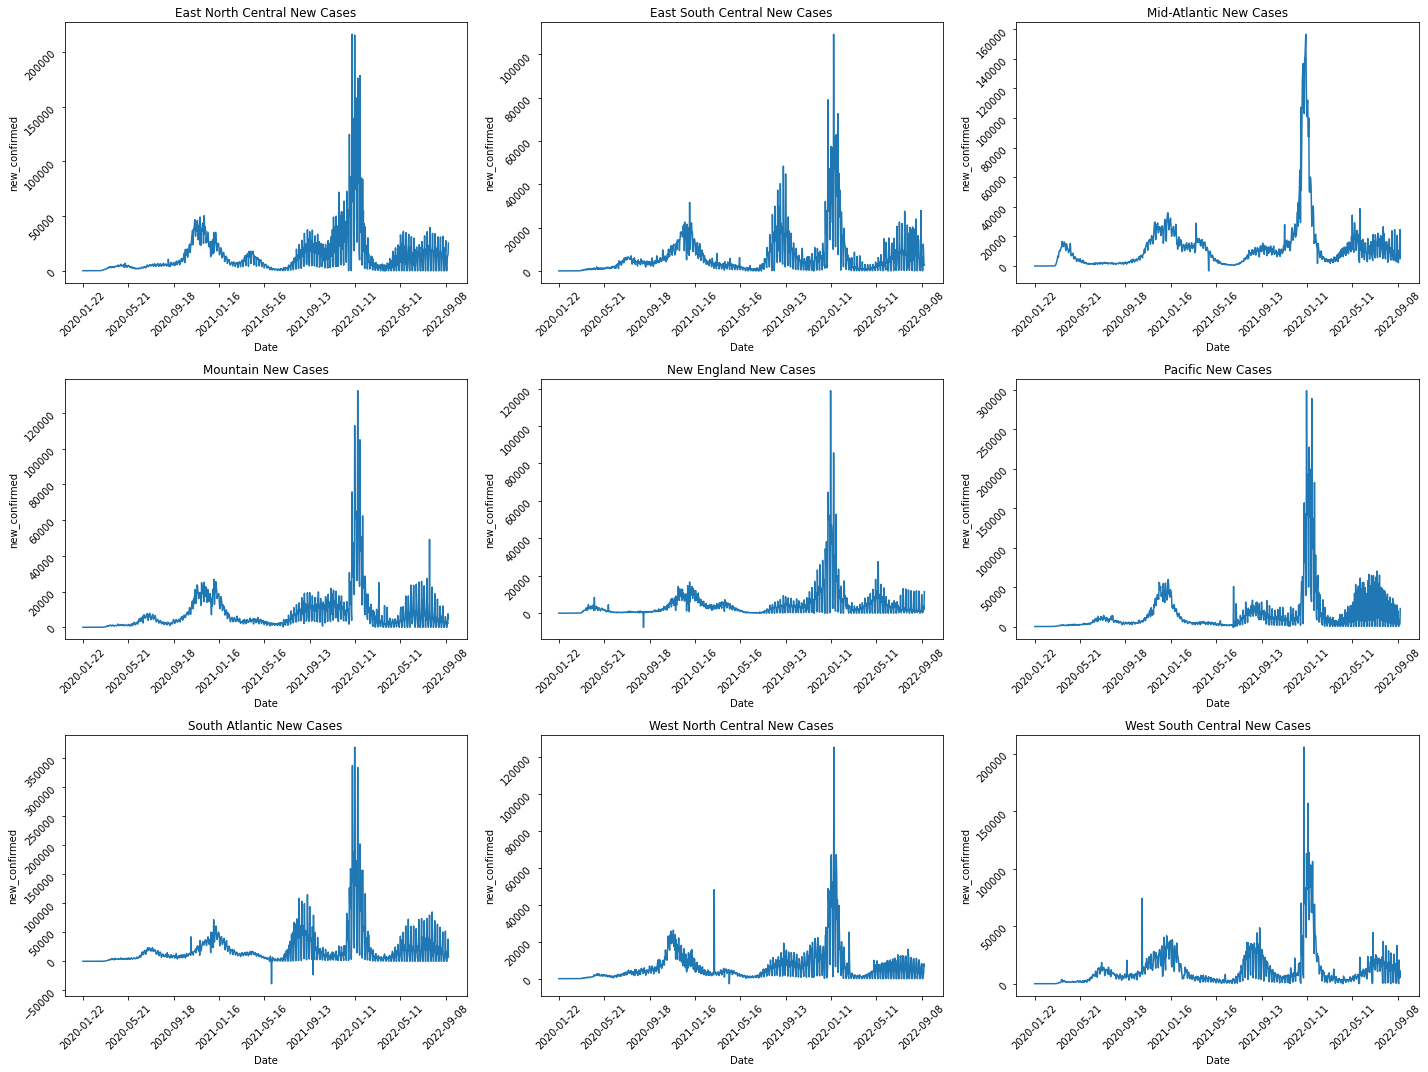

In [19]:
# number of rows and 
fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
axes = axes.flatten()
for i, (name, df) in enumerate(region_gb):
    ax = axes[i]
    y = df['new_confirmed']
    ax.plot(y)
    ax.set_title(name + ' New Cases')
    ax.set_xlabel('Date')
    ax.set_ylabel('new_confirmed')
    ax.tick_params(rotation=45)
    gap = 120
    ax.set_xticks(range(0, len(y.index), gap))
    ax.set_xticklabels(y.index[::gap])

plt.tight_layout()
plt.show()
    

In [24]:
def get_season(date):
    month = date.month
    year = date.year
    if month in [12, 1, 2]:
        return f'winter {year}'
    elif month in [3, 4, 5]:
        return f'spring {year}'
    elif month in [6, 7, 8]:
        return f'summer {year}'
    else:
        return f'fall {year}'

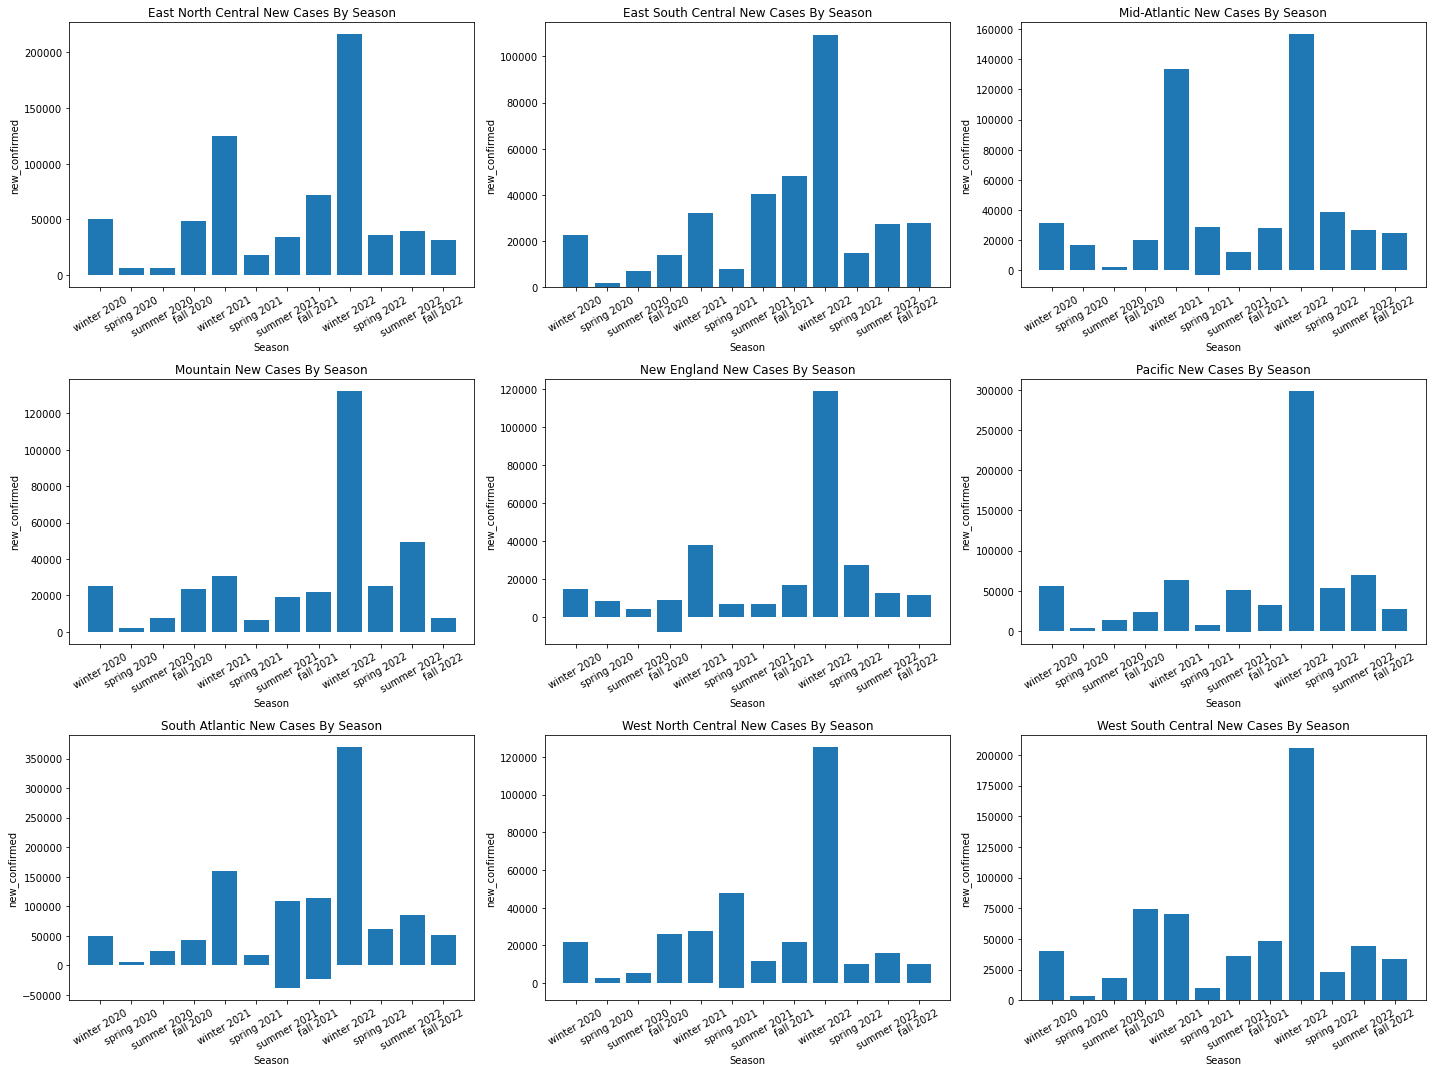

In [37]:

fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
axes = axes.flatten()
for i, (name, df) in enumerate(region_gb):
    ax = axes[i]
    df['season'] = df.index.map(get_season)
   
    ax.bar( df['season'], df['new_confirmed'])
    ax.set_title(name + ' New Cases By Season')
    ax.set_xlabel('Season')
    ax.set_ylabel('new_confirmed')
    ax.tick_params(axis='x', labelrotation=30)
    
plt.tight_layout()
plt.show()
    

## Across all regions

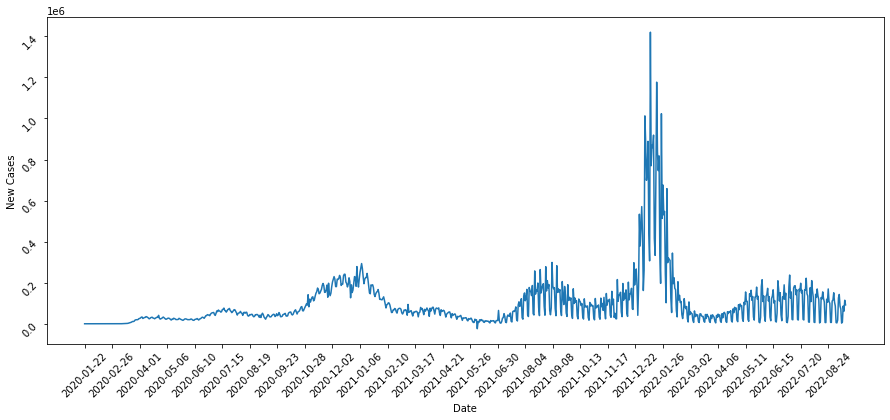

In [11]:
# time series plot
summed_data = uni_data.reset_index().groupby('date').sum()
plt.figure(figsize=(15, 6))
plt.tick_params(rotation=45)
plt.plot(summed_data)
plt.xlabel('Date')
plt.ylabel('New Cases')

gap = 35
plt.xticks(range(0, len(summed_data), gap), summed_data.index[::gap])
plt.show()

<AxesSubplot:ylabel='Count'>

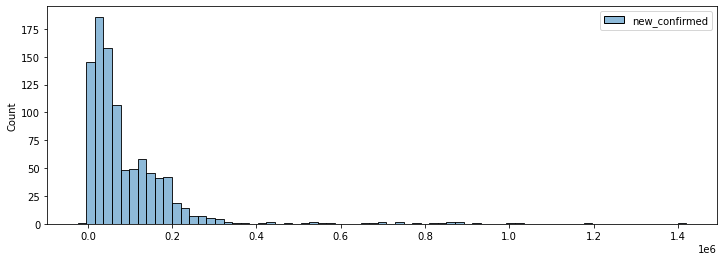

In [4]:
# density of the response variable
plt.figure(figsize=(12, 4))
sns.histplot(summed_data, kde=False)

<AxesSubplot:>

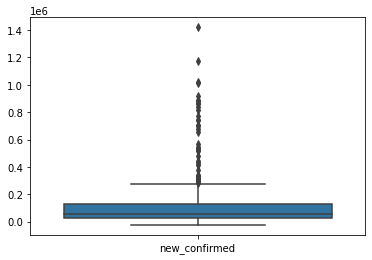

In [5]:
# boxplot of the response variable
plt.figure(figsize=(6, 4))
sns.boxplot(data=summed_data)

<AxesSubplot:title={'center':'New Confirmed Cases by Season'}, xlabel='season', ylabel='new_confirmed'>

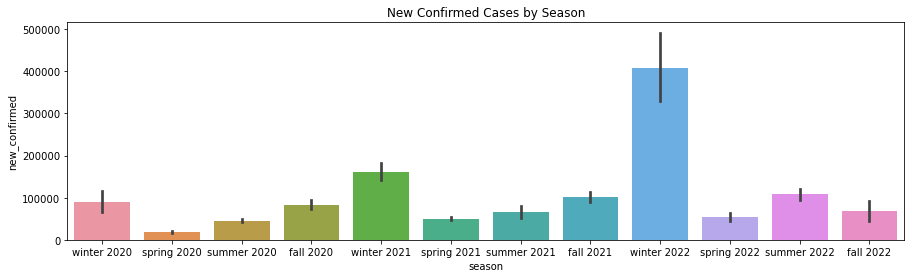

In [9]:
# explore seasonal
plt.figure(figsize=(15, 4)) 
plt.title('New Confirmed Cases by Season')
summed_data.index = pd.to_datetime(summed_data.index)
def get_season(date):
    month = date.month
    year = date.year
    if month in [12, 1, 2]:
        return f'winter {year}'
    elif month in [3, 4, 5]:
        return f'spring {year}'
    elif month in [6, 7, 8]:
        return f'summer {year}'
    else:
        return f'fall {year}'
    
summed_data['season'] = summed_data.index.map(get_season)
sns.barplot(x='season', y='new_confirmed', data=summed_data)

In [10]:
# summary statistics of the response variable
summed_data.describe().round().astype(str)

,new_confirmed
count,968.0
mean,97145.0
std,135739.0
min,-24112.0
25%,26767.0
50%,56620.0
75%,128610.0
max,1420398.0


## Univariate analysis on features  

In [13]:
multi_data = pd.read_csv('../data/regional_multivariate_data.csv')

In [14]:
# spans from 2021-01-12 to 2022-07-15
multi_data.date.min(), multi_data.date.max()

('2021-01-12', '2022-07-15')

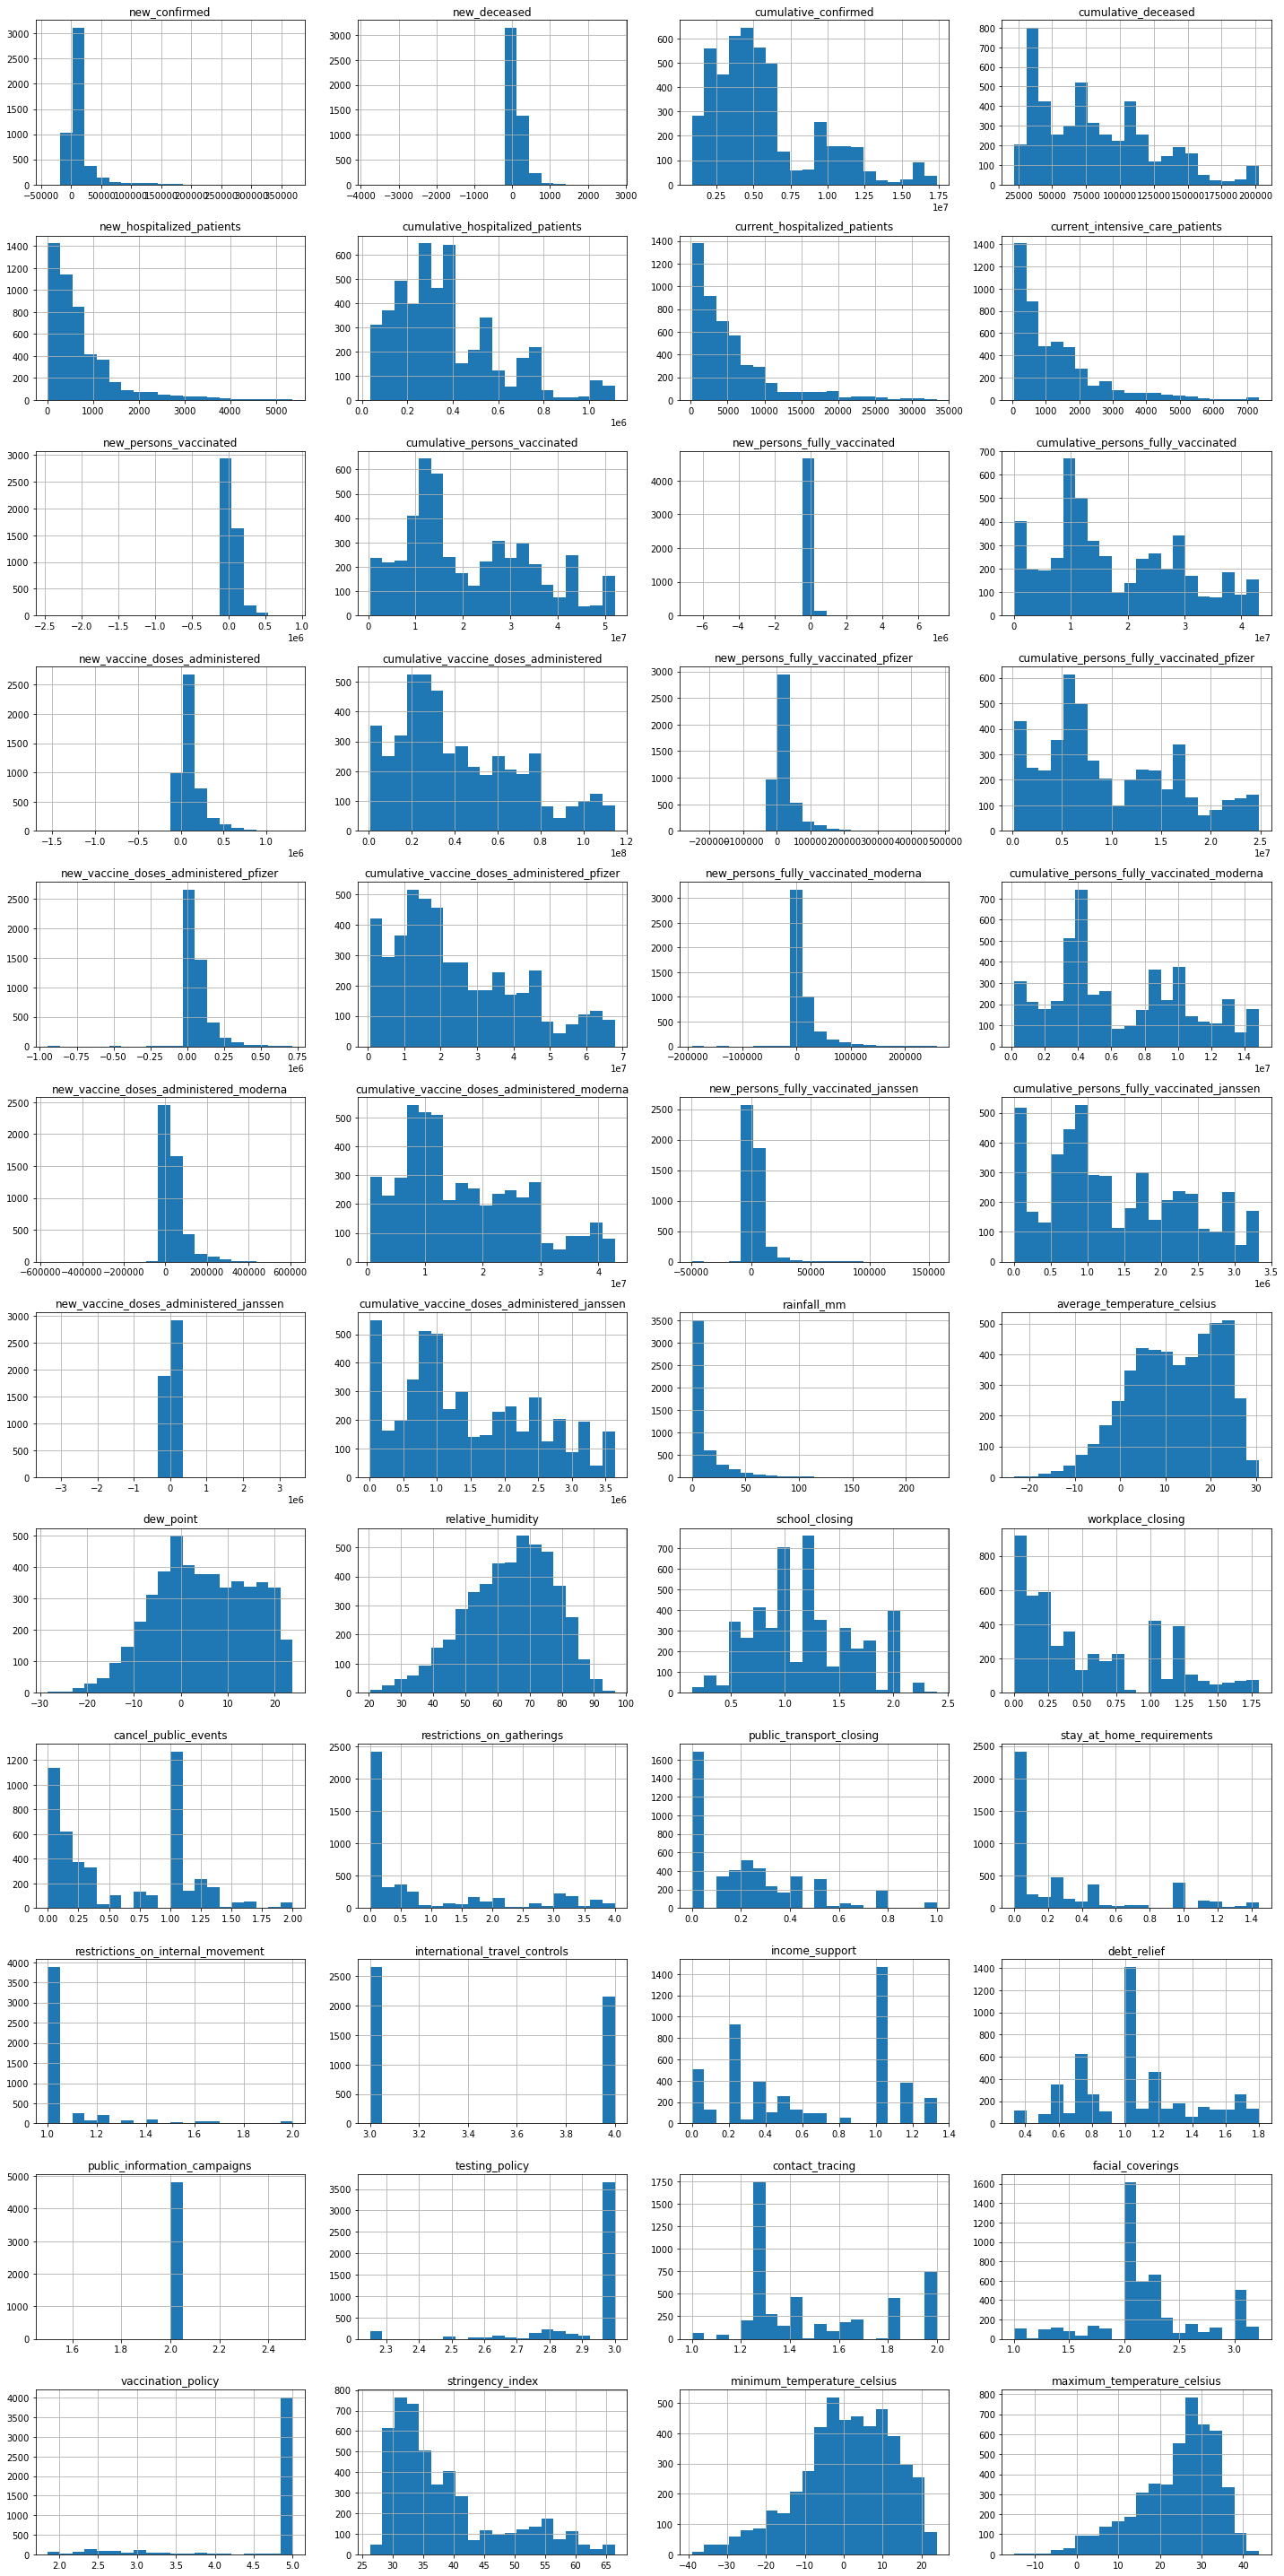

In [15]:
# histograms of every variable 
multi_data['date'] = pd.to_datetime(multi_data['date'])
hist_data = multi_data.iloc[:, 2:52]
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(20, 40))
axes = axes.ravel()
for i, col in enumerate(hist_data.columns):
    hist_data[col].hist(ax=axes[i], bins = 20)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

can easily spot the categorical variables from these histograms and find those cateogircal that are skewed and have little to no variation 
like _public information campaigns_ 

In [16]:
multi_data['public_information_campaigns'].value_counts()

2.0    4811
Name: public_information_campaigns, dtype: int64

#### analysis on the following features
- new persons vaccinated
- new persons hospitalized
- average temperature celsius
- stay at home requirements
- testing policy
- vaccination policy



In [ ]:
features = ["new_persons_vaccinated", "new_hospitalized_patients", "average_temperature_celsius", "stay_at_home_requirements", "testing_policy", "vaccination_policy"]

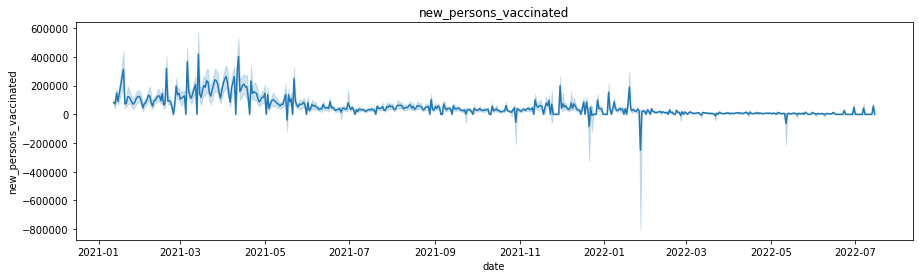

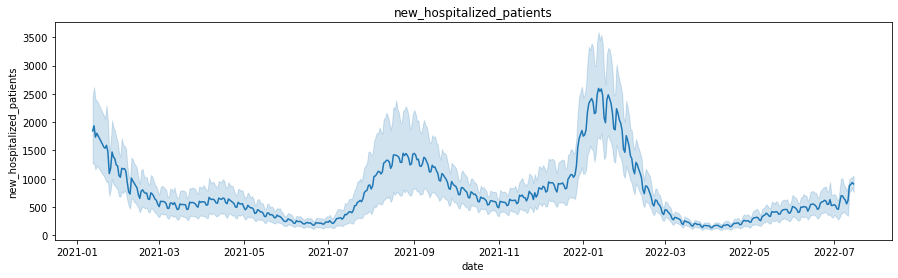

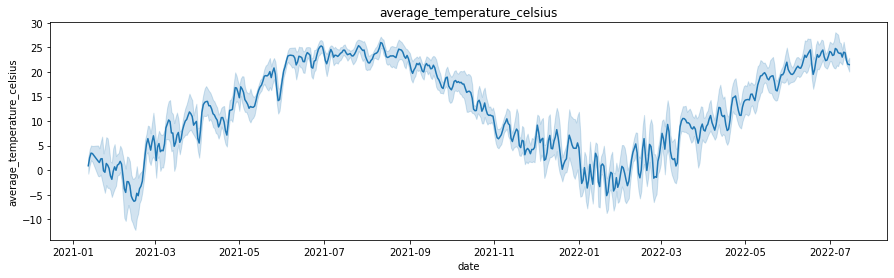

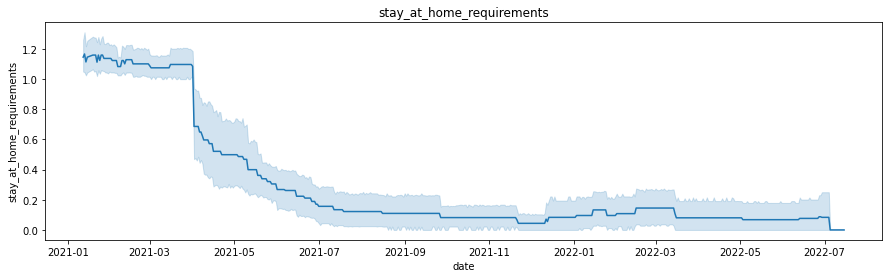

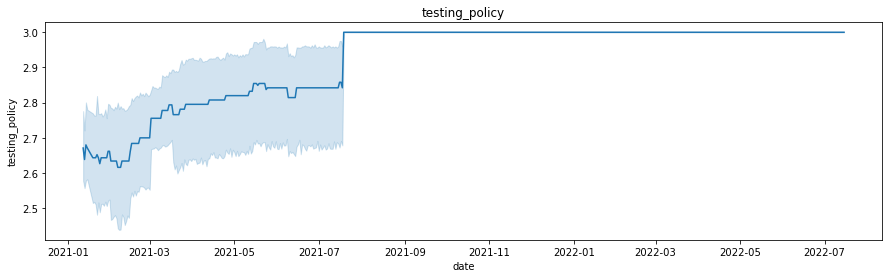

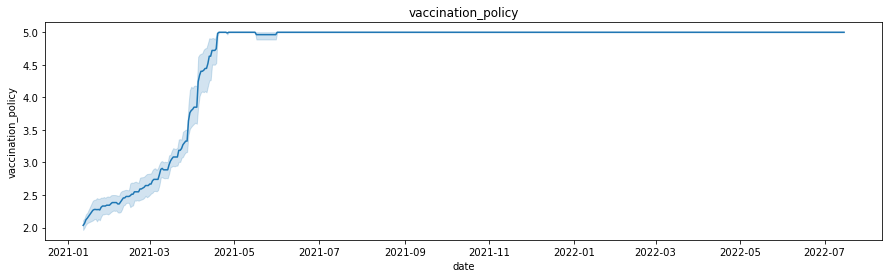

In [21]:
# chart over time 
for col in features:
    plt.figure(figsize=(15, 4))
    plt.title(col)
    sns.lineplot(x='date', y=col, data=multi_data)

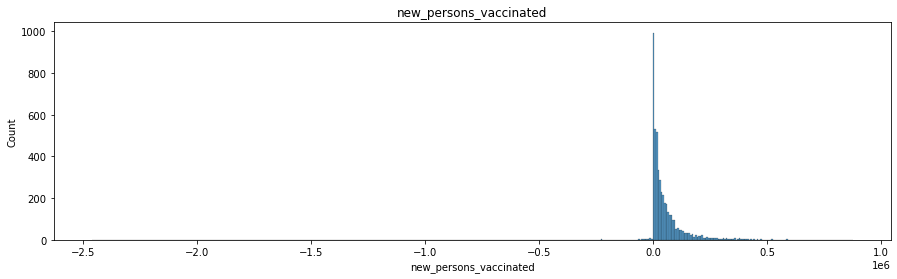

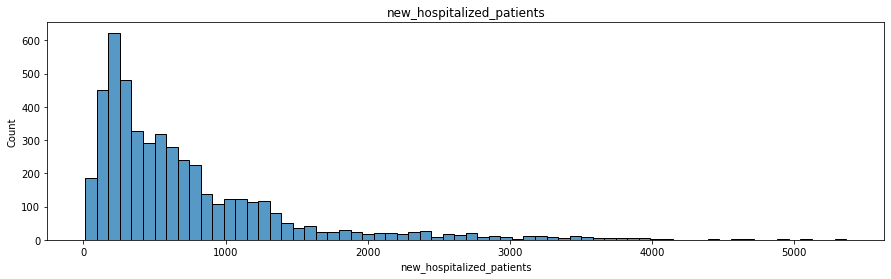

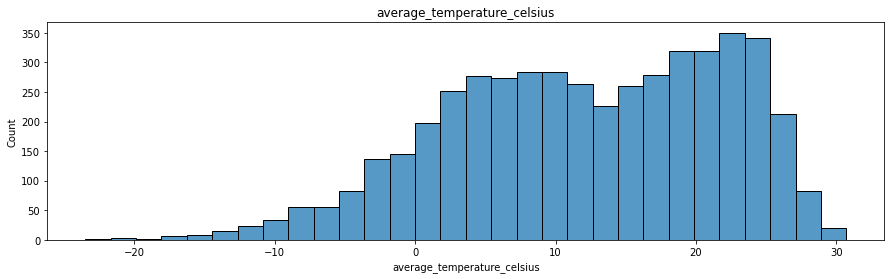

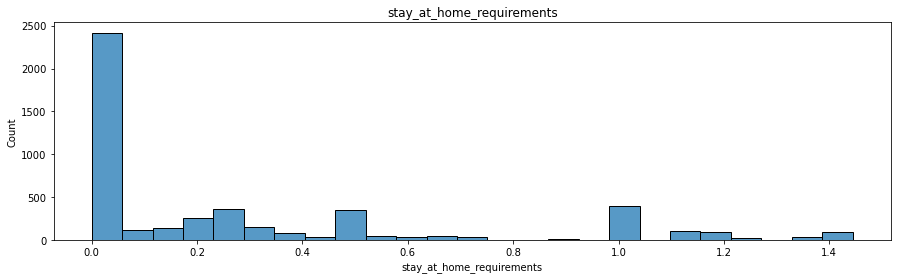

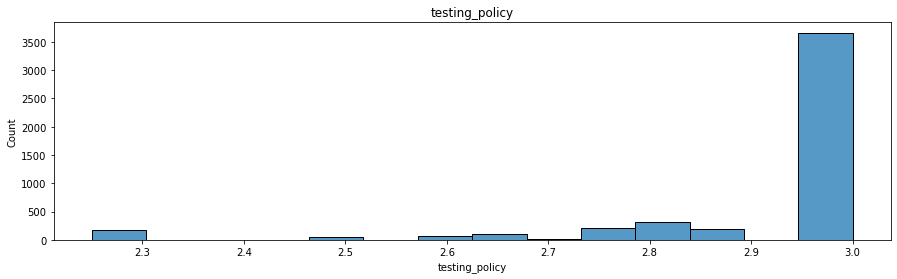

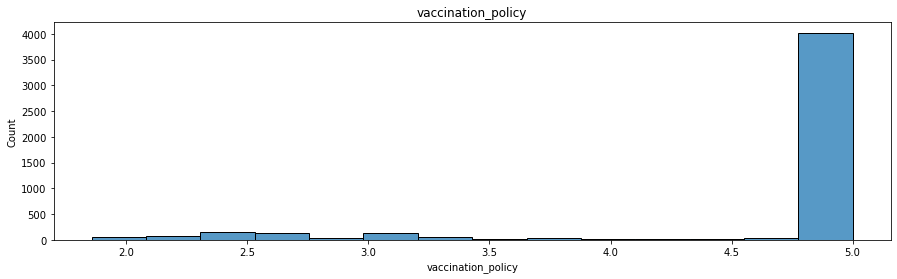

In [22]:
# density of some features
for col in features:
    plt.figure(figsize=(15, 4))
    plt.title(col)
    sns.histplot(multi_data[col], kde=False)

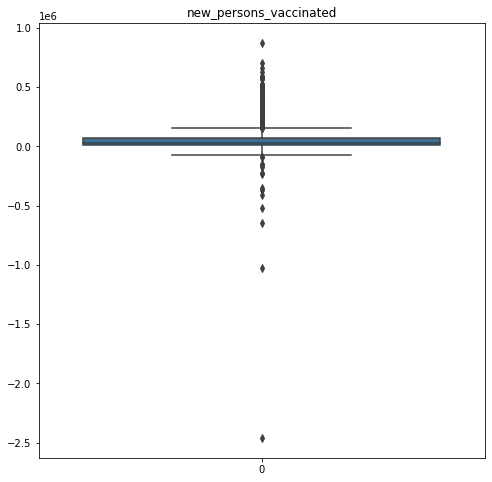

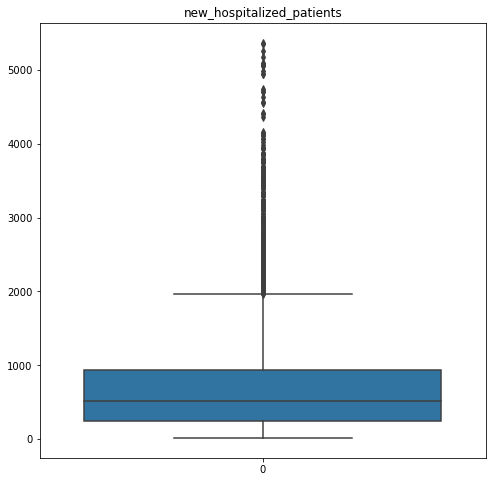

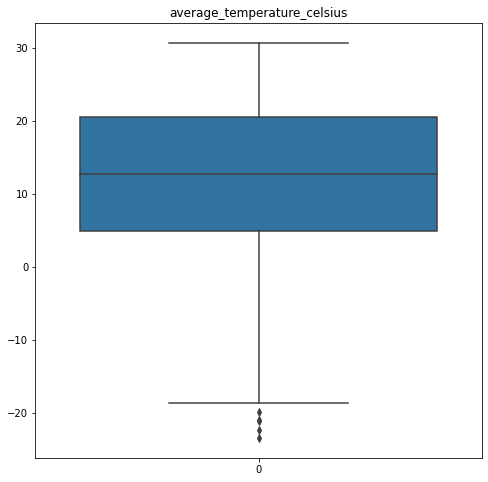

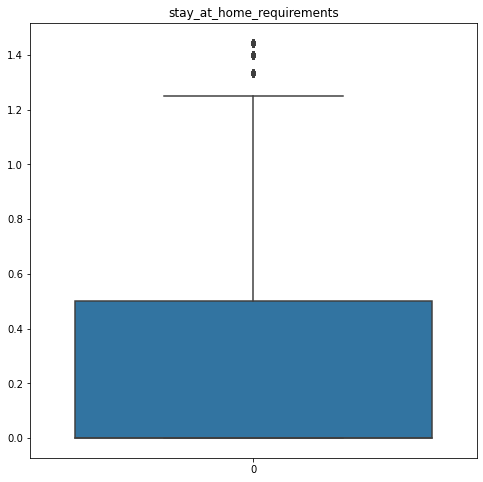

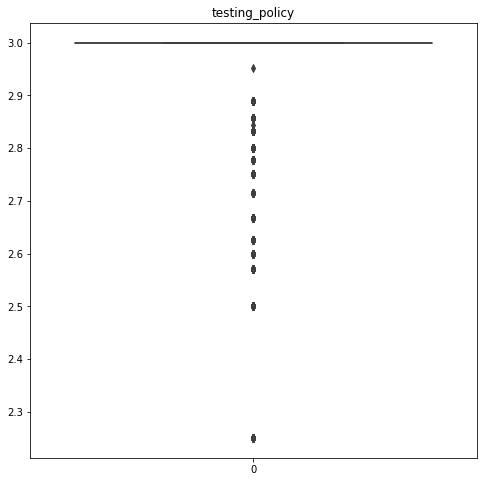

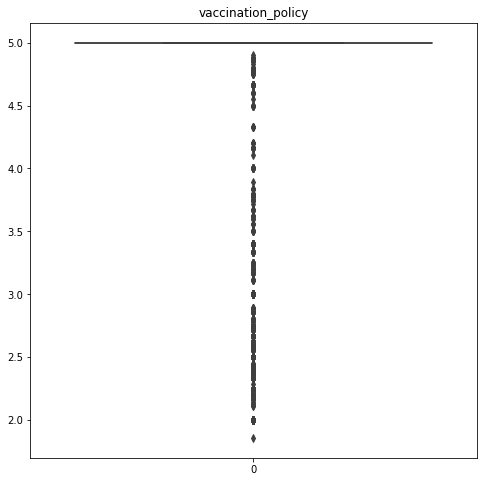

In [24]:
# density of some features
for col in features:
    plt.figure(figsize=(8, 8))
    plt.title(col)
    sns.boxplot(data=multi_data[col])